In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
import warnings
import plotnine as p9
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report,r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from time import process_time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
#from vecstack import stacking


warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("C:/Users/avant/Downloads/heart (1).csv")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/avant/Downloads/heart (1).csv'

1.1 Data Dictionary
age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope
caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable



In [ ]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**shape of the datset**

In [ ]:
print("training data shape: ",train.shape)
train.head()

training data shape:  (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**MISSING VALUES**


In [ ]:
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#unique values in datset

dict = {}
for i in list(train.columns):
    dict[i] = train[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


**seperating categorical and continuous columns**

In [ ]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
The continuous cols are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The target variable is :   ['output']


In [ ]:
#train[con_cols].describe().transpose()

**UNIVARIATE ANALYSIS:**

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

**Analysis on categorical variables:**

In [ ]:
#Analysis on sex variable:
train["sex"].value_counts()


1    713
0    312
Name: sex, dtype: int64

In [ ]:
train["sex"].value_counts(normalize=True)*100


1    69.560976
0    30.439024
Name: sex, dtype: float64

<AxesSubplot: title={'center': 'sex'}>

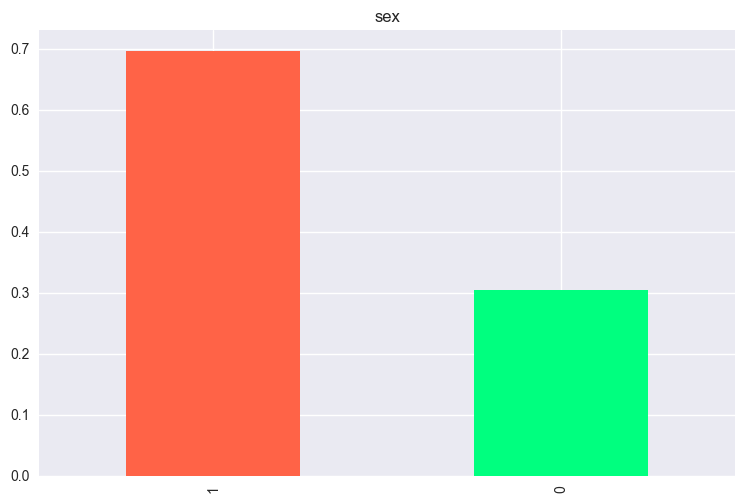

In [ ]:
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
train["sex"].value_counts(normalize=True).plot.bar(title= 'sex',color=c)

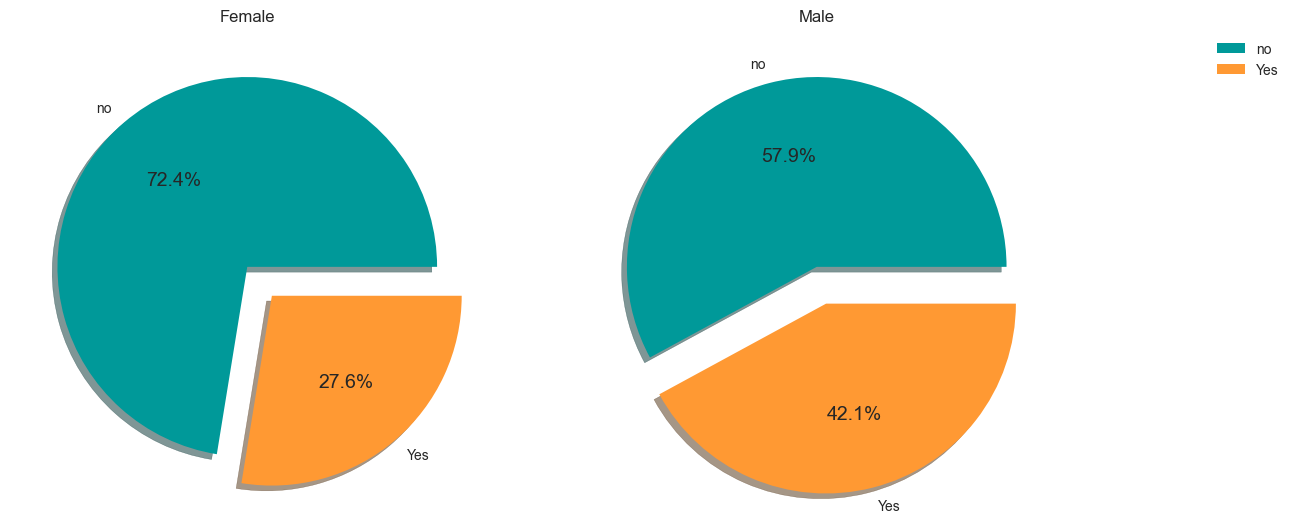

In [ ]:
#plot distribution for sex:
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=train[train.sex==0].target.value_counts(normalize=True),
    labels=['no','Yes'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    #textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']  
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=train[train.sex==1].target.value_counts(normalize=True),
    labels=['no','Yes'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    #textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Male")
plt.legend(['no','Yes'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

In [ ]:
#Analysis on exng variable:
train["exang"].value_counts()


0    680
1    345
Name: exang, dtype: int64

In [ ]:
train["exang"].value_counts(normalize=True)*100


0    66.341463
1    33.658537
Name: exang, dtype: float64

<AxesSubplot: title={'center': 'exng'}>

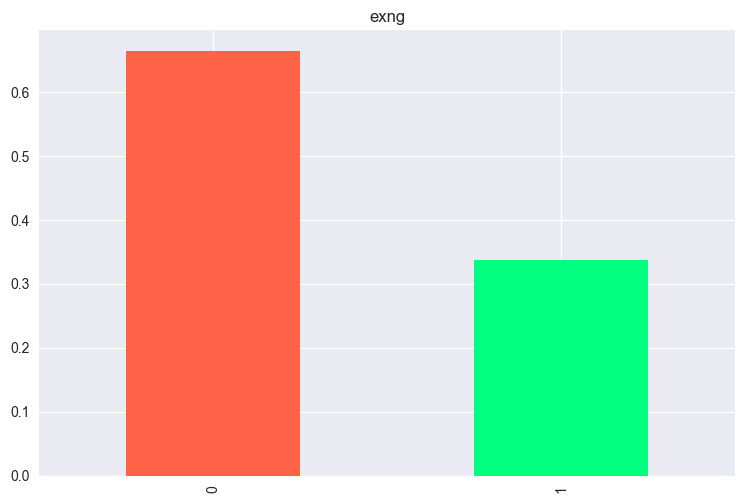

In [ ]:
train["exang"].value_counts(normalize=True).plot.bar(title= 'exng',color=c)

In [ ]:
#Analysis on caa variable:
train["ca"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [ ]:
train["ca"].value_counts(normalize=True)*100

0    56.390244
1    22.048780
2    13.073171
3     6.731707
4     1.756098
Name: ca, dtype: float64

<AxesSubplot: title={'center': 'caa'}>

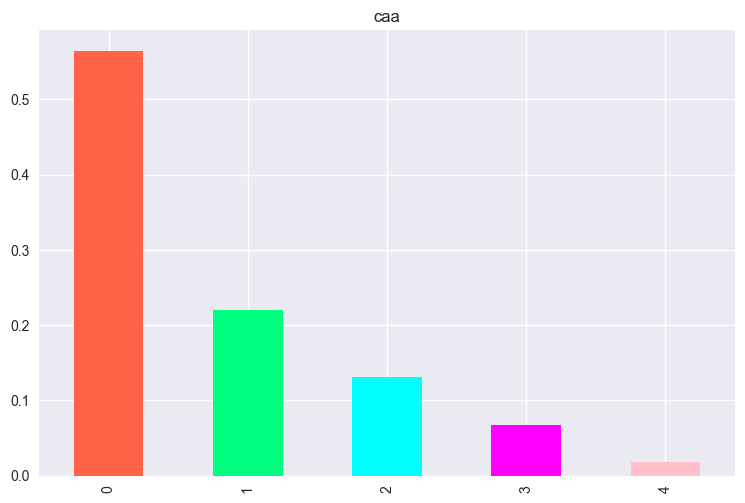

In [ ]:
train["ca"].value_counts(normalize=True).plot.bar(title= 'caa',color=c)

In [ ]:
#Analysis on cp variable:
train["cp"].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [ ]:
train["cp"].value_counts(normalize=True)*100

0    48.487805
2    27.707317
1    16.292683
3     7.512195
Name: cp, dtype: float64

<AxesSubplot: title={'center': 'cp'}>

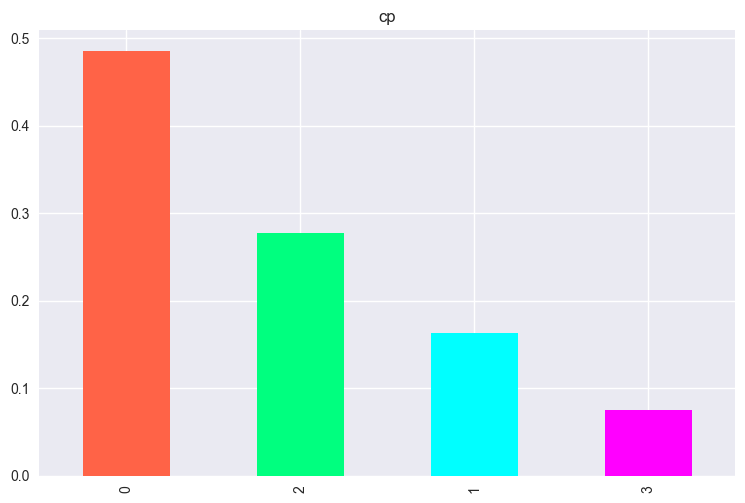

In [ ]:
train["cp"].value_counts(normalize=True).plot.bar(title= 'cp',color=c)

In [ ]:
#Analysis on fbs variable:
train["fbs"].value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [ ]:
train["fbs"].value_counts(normalize=True)*100

0    85.073171
1    14.926829
Name: fbs, dtype: float64

<AxesSubplot: title={'center': 'fbs'}>

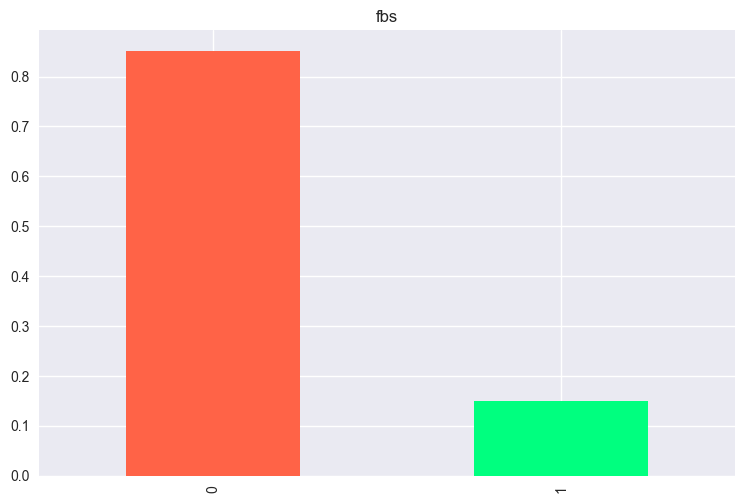

In [ ]:
train["fbs"].value_counts(normalize=True).plot.bar(title= 'fbs',color=c)

In [ ]:
#Analysis on exng variable:
train["restecg"].value_counts()


1    513
0    497
2     15
Name: restecg, dtype: int64

In [ ]:
train["restecg"].value_counts(normalize=True)*100

1    50.048780
0    48.487805
2     1.463415
Name: restecg, dtype: float64

<AxesSubplot: title={'center': 'restecg'}>

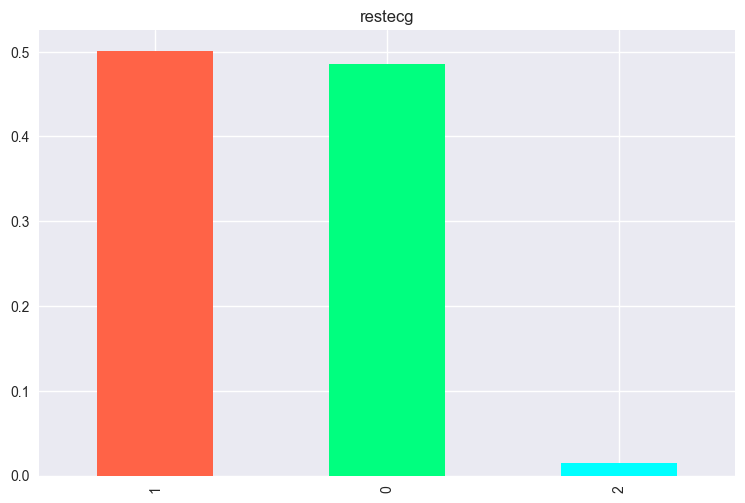

In [ ]:
train["restecg"].value_counts(normalize=True).plot.bar(title= 'restecg',color=c)

In [ ]:
#Analysis on exng variable:
train["slope"].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [ ]:
train["slope"].value_counts(normalize=True)*100

1    47.024390
2    45.756098
0     7.219512
Name: slope, dtype: float64

<AxesSubplot: title={'center': 'slp'}>

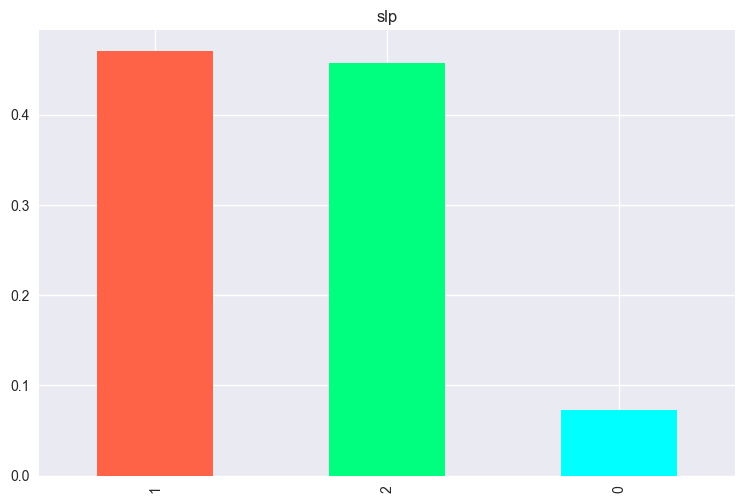

In [ ]:
train["slope"].value_counts(normalize=True).plot.bar(title= 'slp',color=c)

In [ ]:
#Analysis on thall variable:
train["thal"].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [ ]:
train["thal"].value_counts(normalize=True)*100

2    53.073171
3    40.000000
1     6.243902
0     0.682927
Name: thal, dtype: float64

<AxesSubplot: title={'center': 'thall'}>

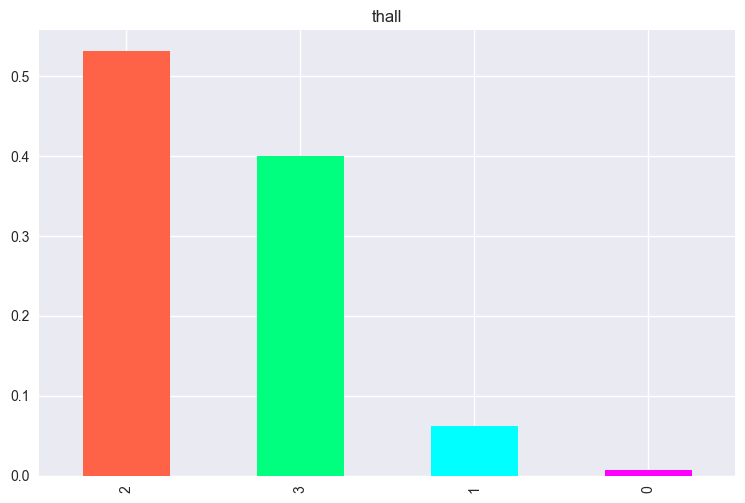

In [ ]:
train["thal"].value_counts(normalize=True).plot.bar(title= 'thall',color=c)

Text(0.5, 0, 'age category')

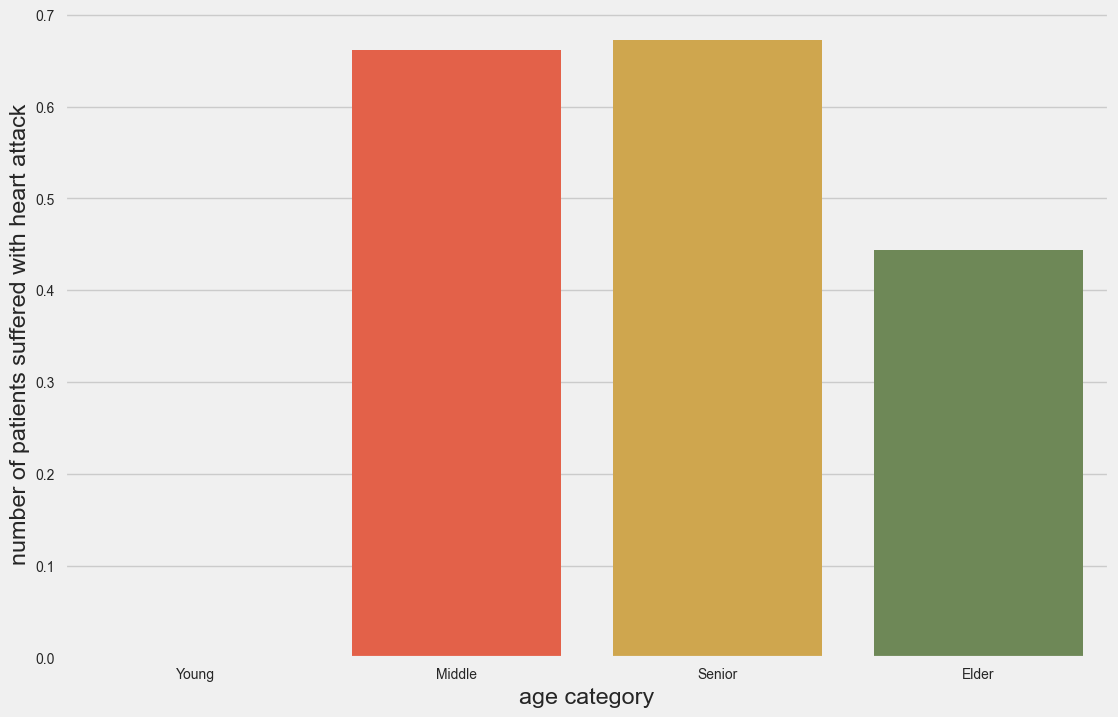

In [ ]:
train['age_label'] = pd.cut(train.age,bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])
train.head(5)
ages = train.pivot_table(values='target',index='age_label')
ages
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ages.index,
    y=ages.target
)
plt.ylabel('number of patients suffered with heart attack')
plt.xlabel('age category')

(array([173., 483., 281.,  71.,  17.]),
 array([ 94. , 115.2, 136.4, 157.6, 178.8, 200. ]),
 <BarContainer object of 5 artists>)

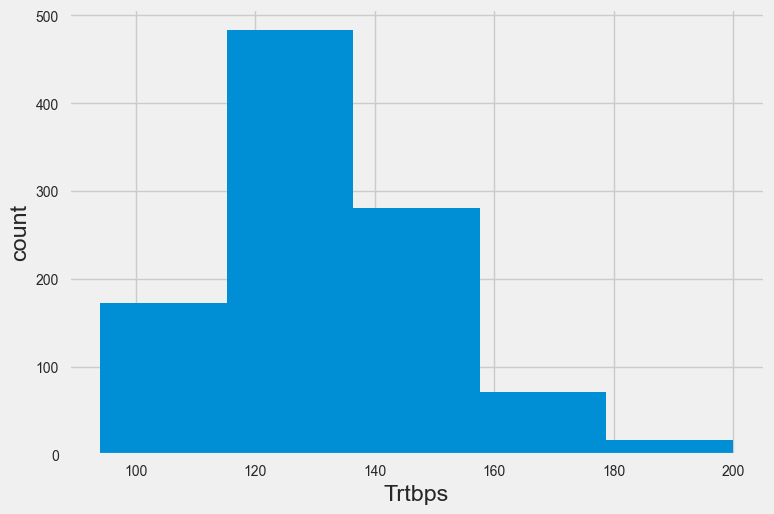

In [ ]:
number_of_bins=5
x=train['trestbps']
plt.xlabel('Trtbps')
plt.ylabel('count')
plt.hist(x,number_of_bins)


(array([289., 590., 130.,  13.,   3.]),
 array([126. , 213.6, 301.2, 388.8, 476.4, 564. ]),
 <BarContainer object of 5 artists>)

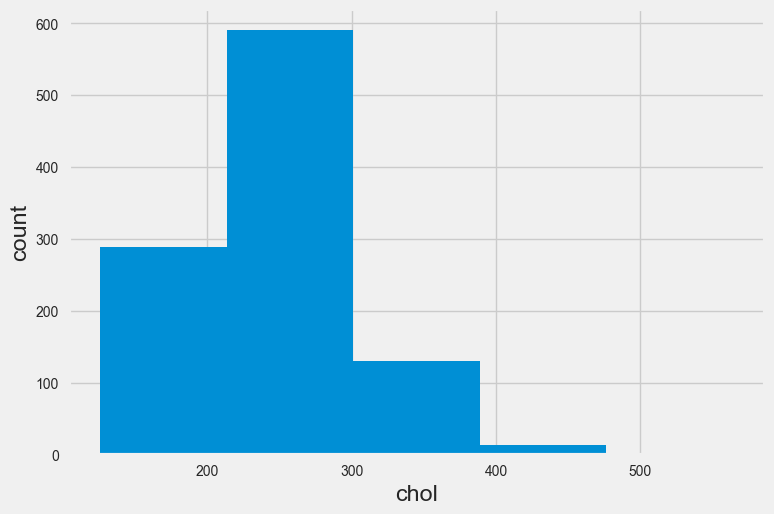

In [ ]:
#cholestrol
number_of_bins=5
x=train['chol']
plt.xlabel('chol')
plt.ylabel('count')
plt.hist(x,number_of_bins)


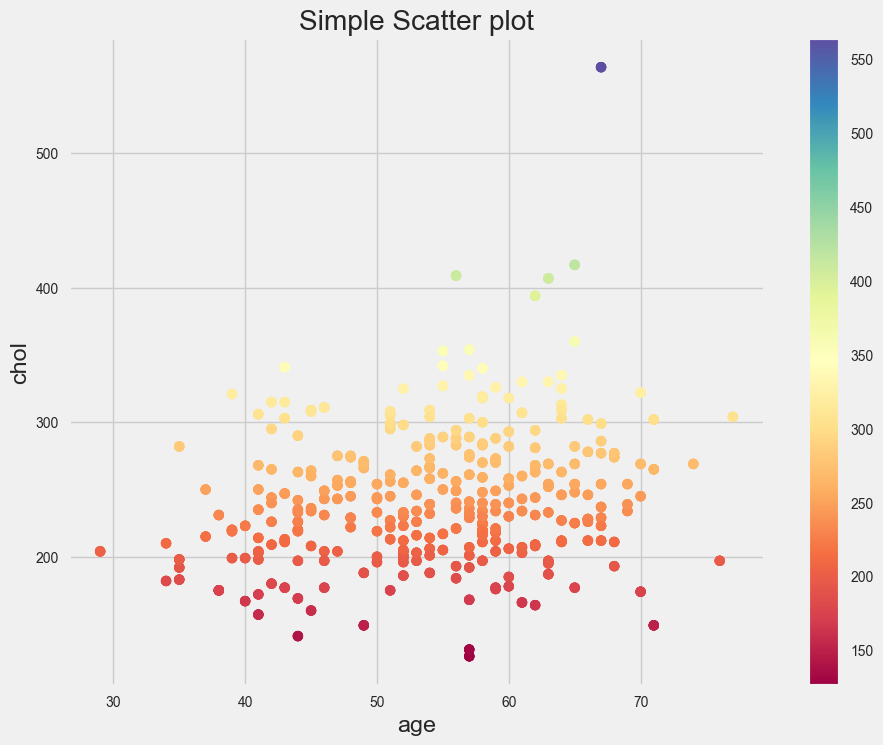

In [ ]:
#chol vs age:
#hist:
x = train['age']
y = train['chol']
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.title('Simple Scatter plot')
plt.xlabel('age')
plt.ylabel('chol')
plt.show()

they are positively correlated:

(array([ 25., 126., 307., 467., 100.]),
 array([ 71. ,  97.2, 123.4, 149.6, 175.8, 202. ]),
 <BarContainer object of 5 artists>)

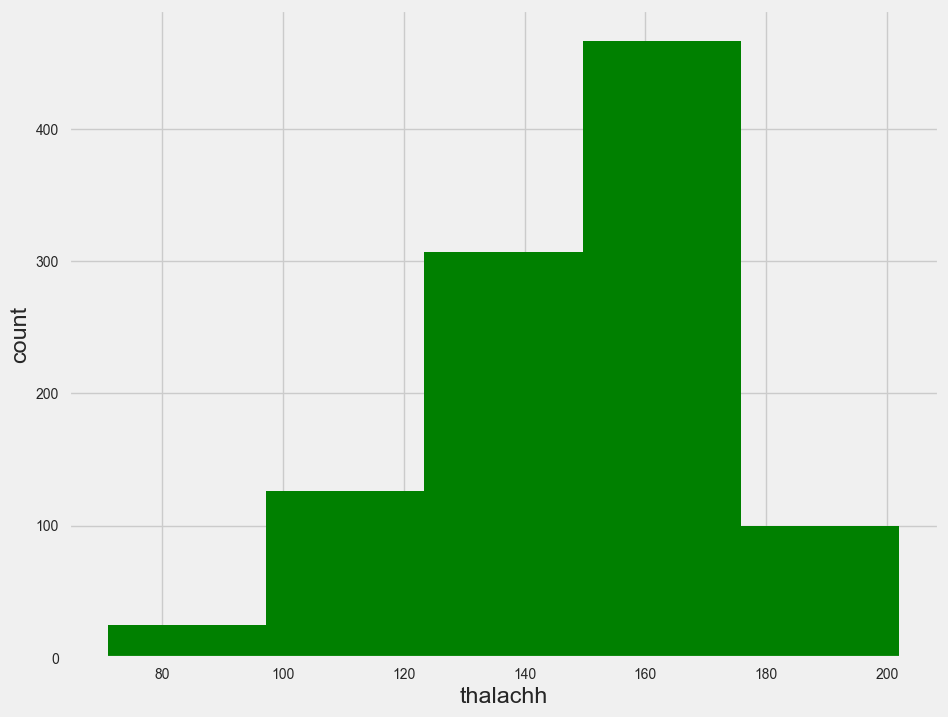

In [ ]:
number_of_bins=5
x=train['thalach']
plt.xlabel('thalachh')
plt.ylabel('count')
plt.hist(x,number_of_bins,color='green')

(array([663., 219., 110.,  26.,   7.]),
 array([0.  , 1.24, 2.48, 3.72, 4.96, 6.2 ]),
 <BarContainer object of 5 artists>)

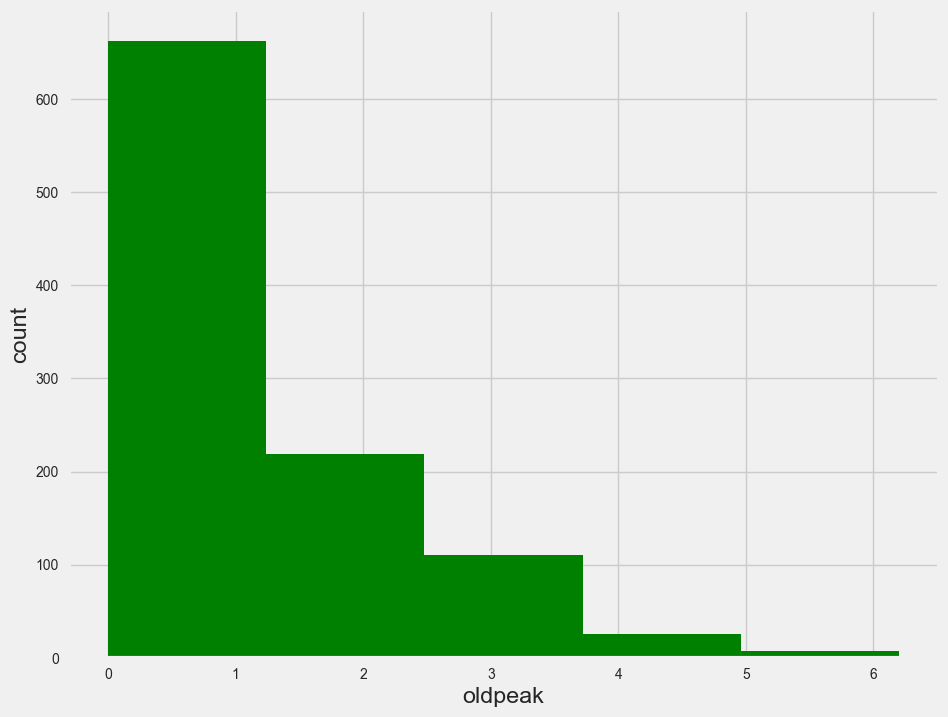

In [ ]:
number_of_bins=5
x=train['oldpeak']
plt.xlabel('oldpeak')
plt.ylabel('count')
plt.hist(x,number_of_bins,color='green')

Text(0.5, 1.0, 'Distribution of age and output')

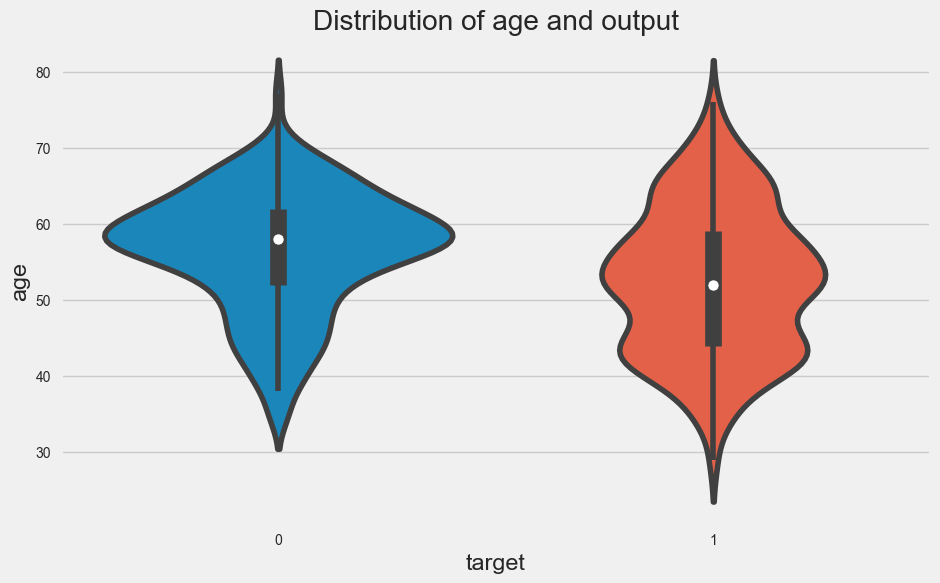

In [ ]:
#bivariate analysis:
plt.figure(figsize=(10,6))
sns.violinplot(x=train["target"], y=train["age"], data=train)
plt.title('Distribution of age and output')

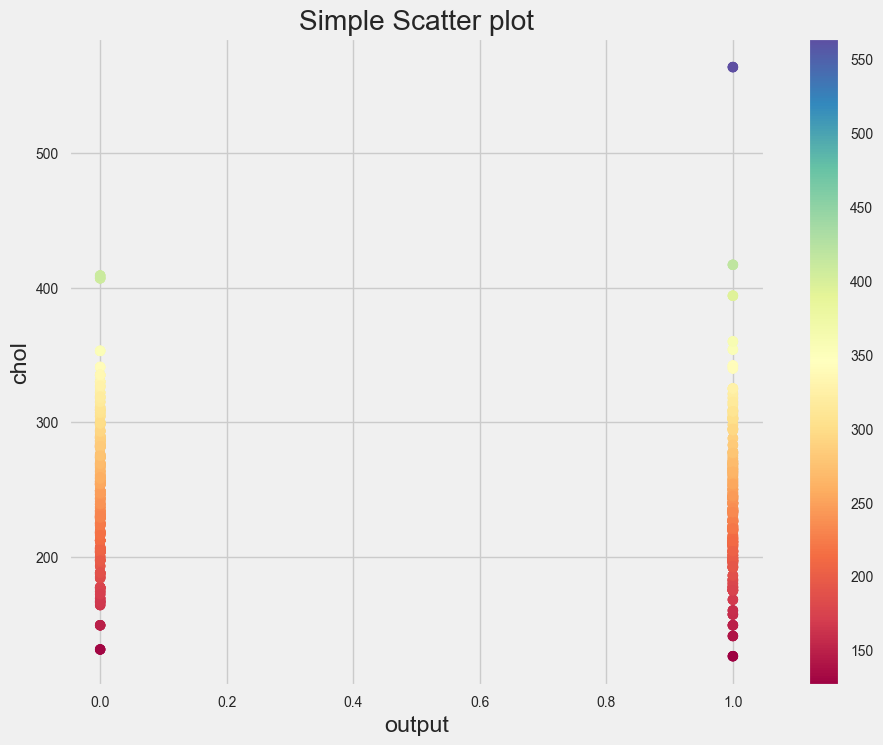

In [ ]:
x = train['target']
y = train['chol']
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.title('Simple Scatter plot')
plt.xlabel('output')
plt.ylabel('chol')
plt.show()

<AxesSubplot: xlabel='cp'>

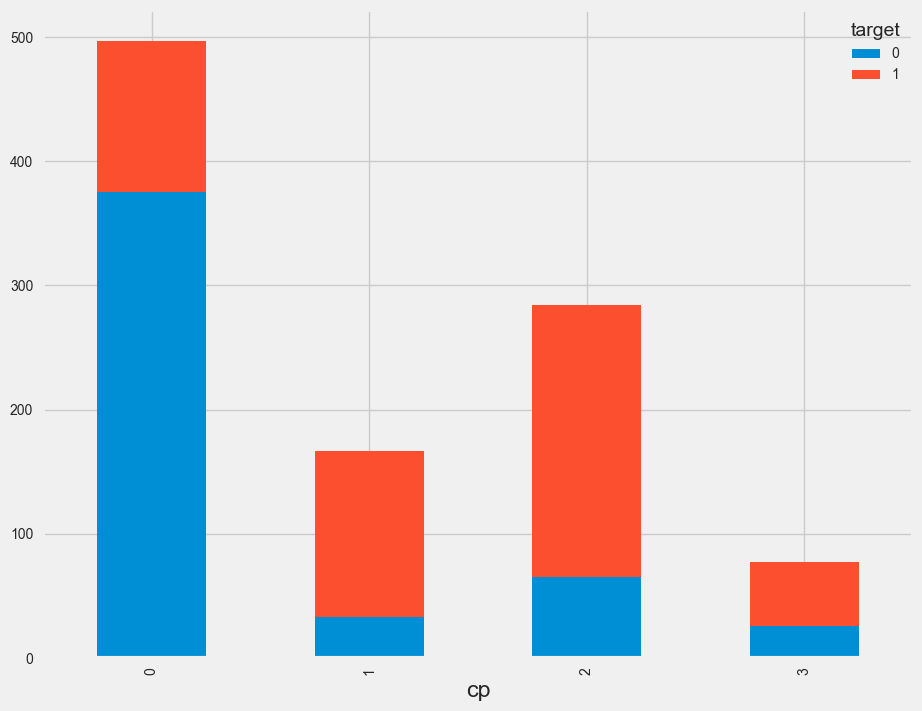

In [ ]:
#cp and output

Cp=train['cp']
output=train['target']
pd.crosstab(Cp,output).plot(kind='bar',stacked=True)

<AxesSubplot: xlabel='thal'>

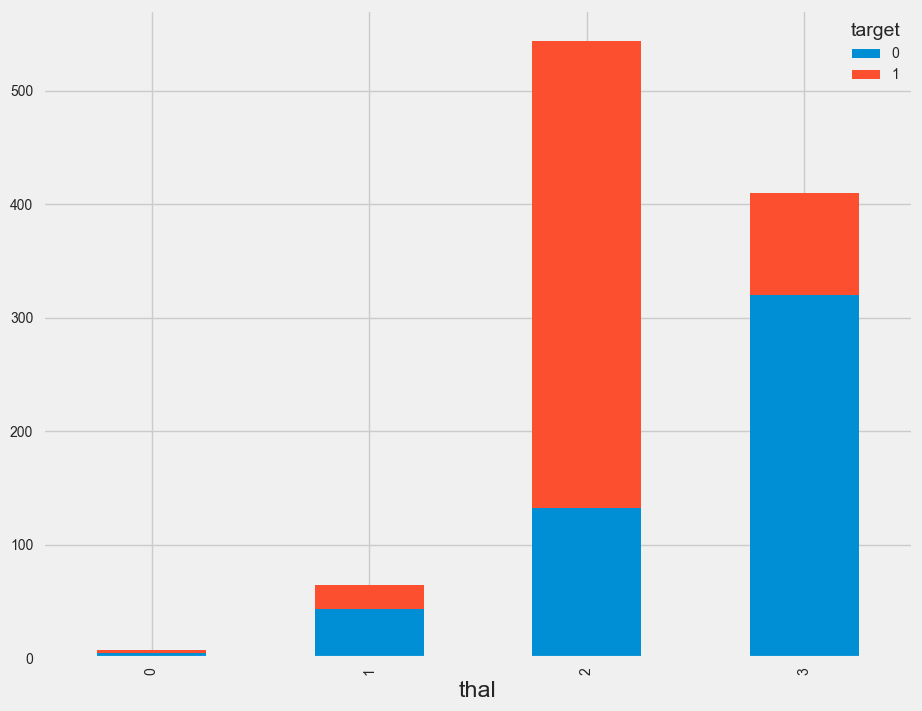

In [ ]:
#thall and output:
thall=train['thal']
output=train['target']
pd.crosstab(thall,output).plot(kind='bar',stacked=True)


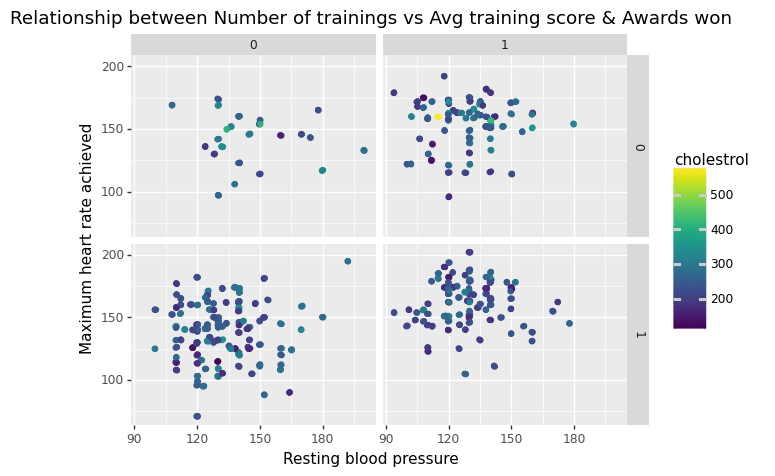

<ggplot: (188425965376)>

In [ ]:
#Multivariate analysis
#Relationship between is_promoted and avg_training_score
(p9.ggplot(data=train,
           mapping=p9.aes(x='trestbps',
                          y='thalach',
                          color='chol'))
    + p9.geom_point(position = "jitter")
    + p9.facet_grid("sex ~ target")+p9.labs(title = "Relationship between Number of trainings vs Avg training score & Awards won",
       x = "Resting blood pressure",
       y = "Maximum heart rate achieved",
       color = "cholestrol")
)

In [ ]:
#Now, we must create corrgram to see a correlation coefficient variable
corr_matrix=train.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Based on corrgram above, we can see that restecg, thalachh, and slp have big correlation coefficient to output

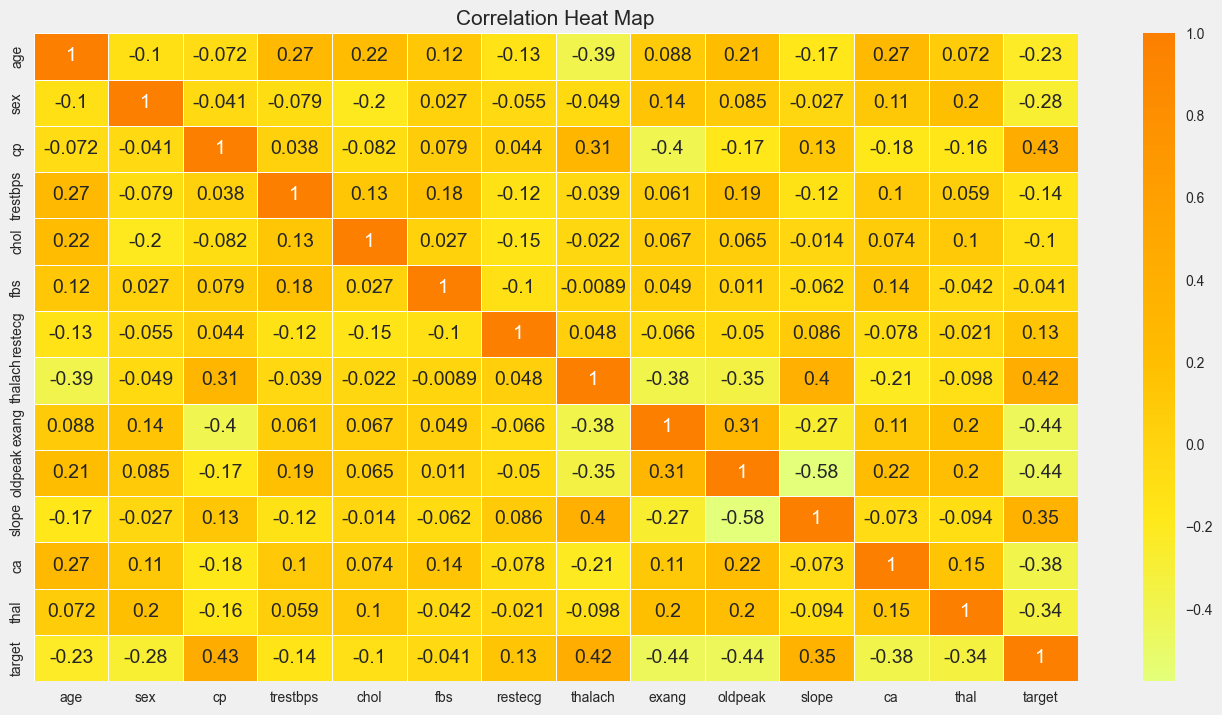

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()




```
# This is formatted as code
```

**OUTLIER ANALYSIS**

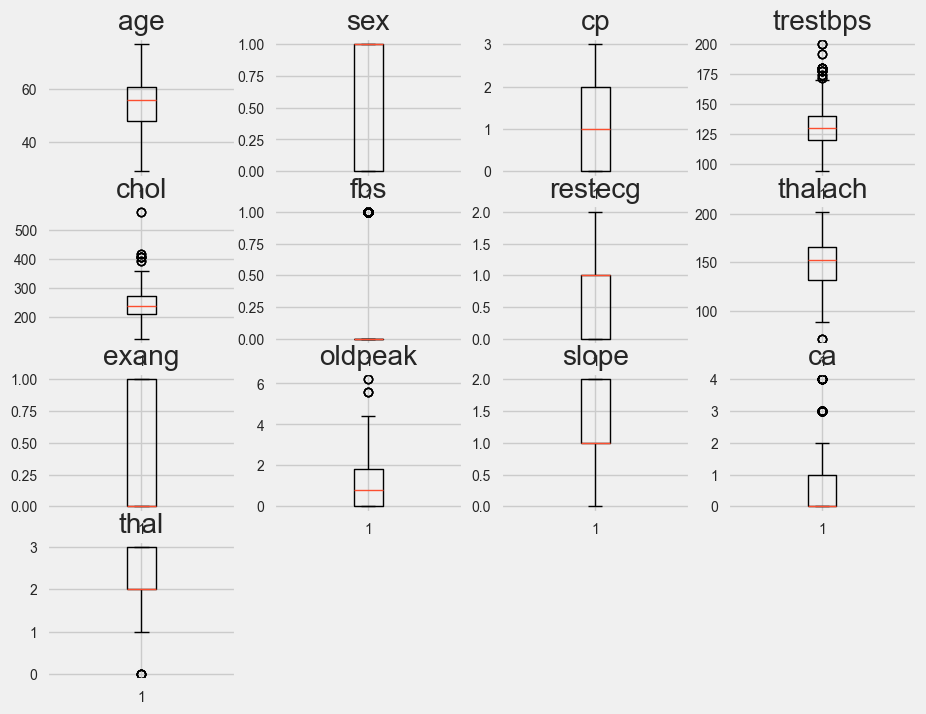

In [ ]:
col=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
plt.figure(figsize=(10,10))
for i in range(0,len(col)):
   plt.subplot(5, 4, i+1)
   plt.boxplot(train[col[i]])
   plt.title(col[i])

**DATA SPLITING**

In [ ]:
#Splitting target data from train data

# Scaling
from sklearn.preprocessing import RobustScaler

x = train.iloc[:, :-2]
y = train.iloc[:, -2]

scaler = RobustScaler()

# scaling the continuous featuree
x[con_cols] = scaler.fit_transform(x[con_cols])
print("The first 5 rows of X are")
x.head()


The first 5 rows of X are


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.307692,1,0,-0.25,-0.437500,0,1,0.470588,0,0.111111,2,2,3
1,-0.230769,1,0,0.50,-0.578125,1,0,0.088235,1,1.277778,0,0,3
2,1.076923,1,0,0.75,-1.031250,0,1,-0.794118,1,1.000000,0,0,3
3,0.384615,1,0,0.90,-0.578125,0,1,0.264706,0,-0.444444,2,1,3
4,0.461538,0,0,0.40,0.843750,1,1,-1.352941,0,0.611111,1,3,2


In [ ]:
# lets print the shapes of these newly formed data sets print("Shape of the x :", x.shape)
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)


Shape of the x : (1025, 13)
Shape of the y : (1025,)


In [ ]:
#Balancing the data
resampler = RandomOverSampler(random_state=1)
X_res,y_res = resampler.fit_resample(x,y)


print(X_res.shape)
print(y_res.value_counts(normalize=True))

(1052, 13)
0    0.5
1    0.5
Name: target, dtype: float64


In [ ]:
# lets print the shape of x and y after resampling it
print(X_res.shape) 
print(y_res.shape)

(1052, 13)
(1052,)


In [ ]:
#We are resampling the data because the given data is highly imbalanced
print("Before Resampling :") 
print(y.value_counts())

print("After Resampling :")
print(y_res.value_counts())

Before Resampling :
1    526
0    499
Name: target, dtype: int64
After Resampling :
0    526
1    526
Name: target, dtype: int64


In [ ]:
X_res.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [ ]:
y_res.dtypes

dtype('int64')

In [ ]:
# split the dataset
X_Train, X_Test, Y_Train, Y_Test = train_test_split(
    X_res, y_res, test_size=0.20, random_state=0)



In [ ]:
print("Shape of the x Train :", X_Train.shape) 
print("Shape of the y Train :", Y_Train.shape) 
print("Shape of the x Valid :", X_Test.shape) 
print("Shape of the y Valid :", Y_Test.shape) 

Shape of the x Train : (841, 13)
Shape of the y Train : (841,)
Shape of the x Valid : (211, 13)
Shape of the y Valid : (211,)


**STANDARDISATION OF DATA**

FEATURE EXTRACTION:

Before feeding this data into our Machine Learning models I decided to divide our data into features (X) and labels (Y) and One Hot Encode all the Categorical Variables.

**RANDOM FOREST**

In [ ]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    #print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[114   0]
 [  0  97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        97

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



**MULTIPLE LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
# creating a regression model
model = LinearRegression()
# fitting the model
model.fit(X_Train,Y_Train)


LinearRegression()

In [ ]:
# making predictions
# extract the predicted probabilities
predictions = model.predict(X_Test)
p_pred = predictions.flatten()
print(p_pred.round(2))
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)


[ 1.01 -0.12  0.73  0.32  0.26  0.73  0.96  0.65  0.09  0.42  0.19  0.34
  0.61  0.54  0.6  -0.14  0.07  0.42 -0.18 -0.1  -0.05  1.03  1.01  0.36
  0.8  -0.05  0.89  0.39  0.86  0.21  0.44 -0.18  0.9   0.76  0.04  0.82
  0.87  1.12  1.08  0.24  0.81  0.53  0.74 -0.06  0.6   0.75  0.96  0.68
  1.01  0.73  0.71  0.15  0.31  0.62  0.82  0.05  0.4   0.79 -0.12  0.65
  0.15  0.59  0.84  0.9   0.03  0.73  0.1  -0.09  1.13  0.05  0.49  0.21
  0.13  0.28 -0.05  0.1  -0.17  0.51  0.64  0.73  0.62  0.4   1.01 -0.18
  0.8  -0.26  0.85 -0.1   0.24 -0.19  0.65  0.8   0.47  0.51  0.47  0.59
  0.64  0.25 -0.14  0.23  0.73 -0.26  0.55  0.04  0.92  0.63  0.76  0.92
  0.68  0.85  0.04  0.51  0.41  0.68 -0.18  0.09  0.3   0.15  0.13  1.2
  0.44  1.08  1.14  1.14  0.72 -0.05  0.03  0.92  0.65  1.02 -0.19  0.8
  0.67  0.89 -0.18  0.6  -0.16  0.78  0.59  0.24  0.8   0.34  0.44  0.56
  0.73  0.5   0.01  1.13  0.68  0.81  0.63  0.1   0.22  0.96  0.83  0.25
  0.01  0.4   0.9   0.73  0.94  0.34 -0.21 -0.17  0.6

**LOGISTIC REGRESSION**

In [ ]:
#Logistic regression:
#Model Development and Prediction
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(random_state=16)
modelLogistic.fit(X_Train, Y_Train)
#Prediction of values
y_pred = modelLogistic.predict(X_Test)
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
print("r2 score: ", r2_score(Y_Test,y_pred))
# model evaluation
print('mean_squared_error : ', mean_squared_error(Y_Test, y_pred))
print('mean_absolute_error : ', mean_absolute_error(Y_Test,y_pred))


[[91 23]
 [10 87]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       114
           1       0.79      0.90      0.84        97

    accuracy                           0.84       211
   macro avg       0.85      0.85      0.84       211
weighted avg       0.85      0.84      0.84       211

r2 score:  0.37032013022246346
mean_squared_error :  0.15639810426540285
mean_absolute_error :  0.15639810426540285


In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(Y_Test, y_pred)
print(cnf_matrix)

[[91 23]
 [10 87]]


Text(0.5, 709.5555555555555, 'Predicted label')

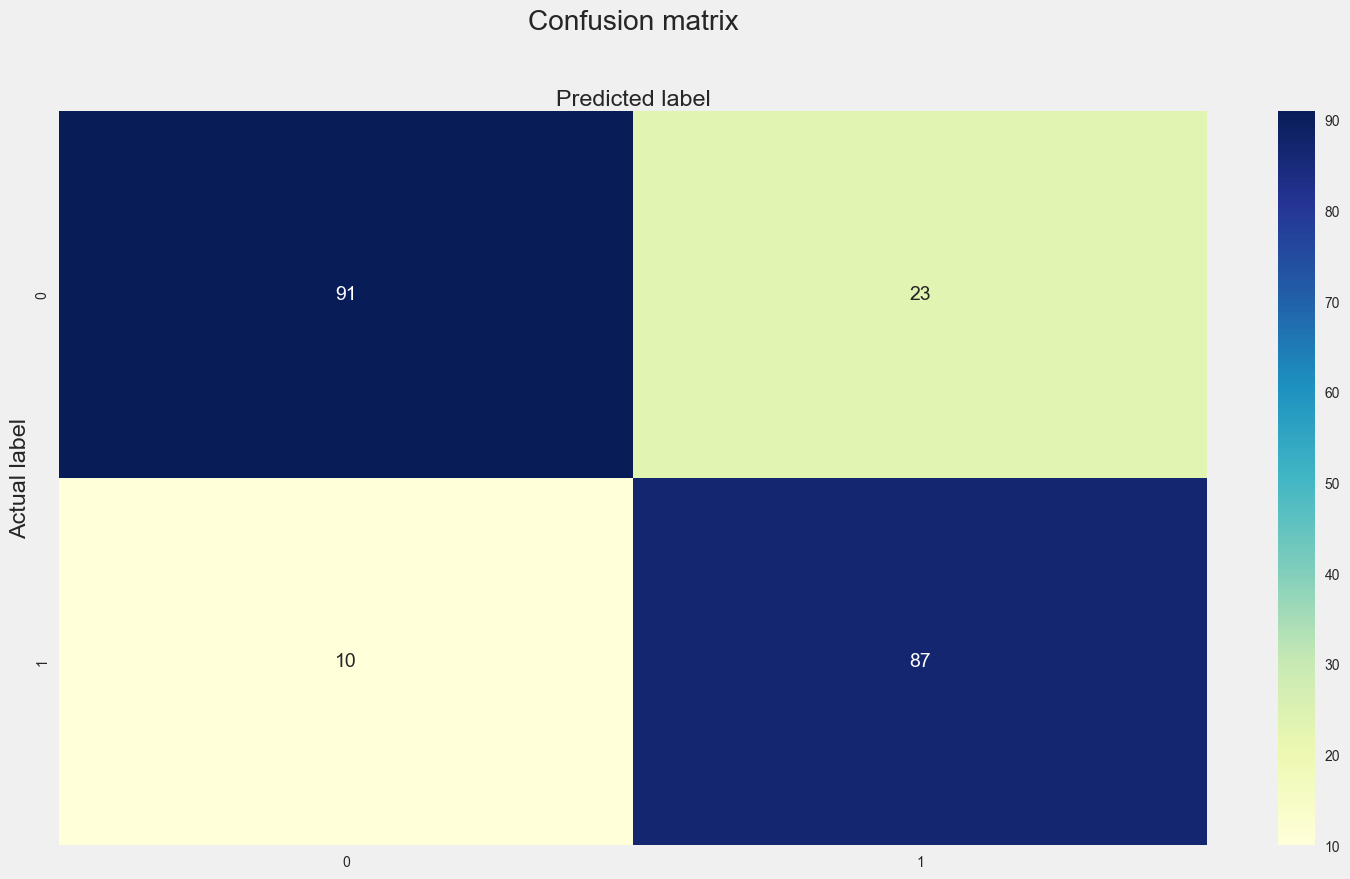

In [ ]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**DESICION TREE CLASSIFIER**

In [ ]:
# Lets use Decision Trees to classify the data 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(X_Train, Y_Train)
#prediction of test values
y_pred = model.predict(X_Test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))
print("r2 score: ", r2_score(Y_Test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(Y_Test, y_pred)))
print('mean_absolute_error: ', mean_absolute_error(Y_Test, y_pred))

Accuracy: 1.0
r2 score:  1.0
RMSE:  0.0
mean_absolute_error:  0.0


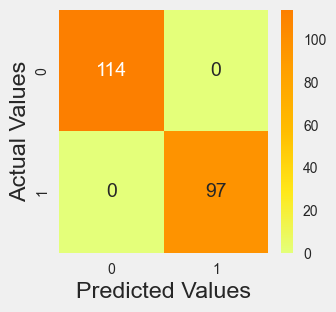

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, y_pred) 
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g') 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values') 
plt.show()

**SVM**

In [ ]:
# Making the SVM Classifer
Classifier = SVC(kernel="linear")
# Training the model on the training data and labels
Classifier.fit(X_Train, Y_Train)
# Using the model to predict the labels of the test data
y_pred = Classifier.predict(X_Test)
# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(Y_Test,y_pred)*100
confusion_mat = confusion_matrix(Y_Test,y_pred)
# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 84.36018957345972
Confusion Matrix
[[90 24]
 [ 9 88]]


**KNN**

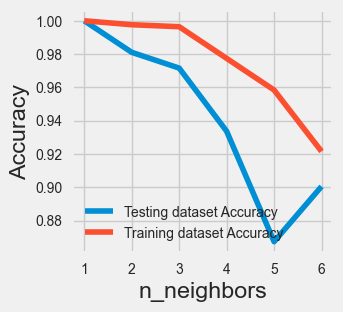

Accuracy for KNN is: 90.04739336492891
Confusion Matrix
[[103  11]
 [ 10  87]]


In [ ]:
neighbors = np.arange(1, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_Train, Y_Train)
    test_accuracy[i] = knn.score(X_Test, Y_Test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
y_pred = knn.predict(X_Test)
accuracy = accuracy_score(Y_Test,y_pred)*100
confusion_mat = confusion_matrix(Y_Test,y_pred)
# Printing the results
print("Accuracy for KNN is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_Train, Y_Train)
y_pred = model.predict(X_Test)
accuracy = accuracy_score(Y_Test,y_pred)*100
print("Accuracy for AdaBoost is:",accuracy)


Accuracy for AdaBoost is: 90.04739336492891


**XGB**

In [ ]:
'''xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


xgb_model.fit(X_Train, Y_Train, early_stopping_rounds=10, eval_set=[(X_Test, Y_Test)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)'''

'xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")\n\n\nxgb_model.fit(X_Train, Y_Train, early_stopping_rounds=10, eval_set=[(X_Test, Y_Test)], verbose=False)\n\nxgb.plot_importance(xgb_model)\n\n# plot the output tree via matplotlib, specifying the ordinal number of the target tree\n# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)\n\n# converts the target tree to a graphviz instance\nxgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)'

**STACKING**

In [ ]:
pip install vecstack

Note: you may need to restart the kernel to use updated packages.


**ENSEMBLE MODEL**

In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold


kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
#model1 = get_stacking()
#estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier()
estimators.append(('knn', model3))
model4= AdaBoostClassifier()
estimators.append(('adaboost', model4))
model5 = GaussianNB()
estimators.append(('guassian', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
results = model_selection.cross_val_score(ensemble, X_Train, Y_Train, cv=cv)
print(results.mean())



0.9342530345471521


In [ ]:
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

def get_stacking():
	# define the base models
	level0 = list()
	#level0.append(('lr', SVC()))
	level0.append(('xgb', xgb.XGBClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	#level0.append(('svm', AdaBoostClassifier()))
	level0.append(('random_forest', RandomForestClassifier()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
models=get_stacking()
results = model_selection.cross_val_score(models, X_Train, Y_Train, cv=cv)
print(results.mean())
models=models.fit(X_Train,Y_Train)


0.98812324929972


In [ ]:

import pickle
file_name = "class_final.pkl"

# save
pickle.dump(models, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))
